# Paket Prabayar Manakah yang Lebih Baik?

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

**KONTEN**

* [Pendahuluan]
* [Tahap 1. Eksplorasi Data]
    * [1.1 Inisialisasi]
    * [1.2 Memuat Data]
    * [1.3 Mempersiapkan Data]
    * [1.4 Kesimpulan dan Langkah-Langkah Selanjutnya]
* [Tahap 2. Pra-pemrosesan Data]   
    * [2.1 Paket Prabayar]
    * [2.2 Pengguna]
    * [2.3 Panggilan]
    * [2.4 Pesan/SMS]
    * [2.5 Internet]
    * [2.6 Mempelajari Syarat dan Kondisi Terkait Paket Prabayar]
    * [2.7 Mengagregasi Data per Pengguna]
    * [2.8 Mempelajari Perilaku Pengguna]
        * [2.8.1 Panggilan]
        * [2.8.2 Pesan/SMS]
        * [2.8.3 Internet]
    * [2.9 Pendapatan]
* [Tahap 3. Menguji Hipotesis statistik]
    * [3.1 Pendapatan rata-rata dari pengguna paket prabayar **Ultimate** dan **Surf** berbeda.]
    * [3.2 Pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain]
* [Kesimpulan Umum]

## Pendahuluan 

Dalam proyek kali ini, kita akan mempelajari dan menganalisis perilaku para pengguna atau klien perusahaan operator telekomunikasi Megaline, lalu menentukan paket prabayar manakah yang menghasilkan lebih banyak pendapatan.

### Tujuan: 
Menguji hipotesis:

1. Pendapatan rata-rata dari pengguna paket prabayar **Ultimate** dan **Surf** berbeda.
2. Pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain

### Tahapan
Kumpulan data klien yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018 disimpan dalam *file* berikut:
 - `/datasets/megaline_calls.csv`
 - `/datasets/megaline_internet.csv`
 - `/datasets/megaline_messages.csv`
 - `/datasets/megaline_plans.csv `
 - `/datasets/megaline_users.csv`

Pertama, kita akan mengevaluasi kualitas data dan melihat apakah masalahnya signifikan. Kemudian, selama pra-pemrosesan data, kita akan mencoba mengatasi masalah yang muncul pada data tersebut, seperti nilai yang hilang, duplikasi, dan sebagainya. Terakhir, kita akan menguji hipotesis dan menarik kesimpulan berdasarkan data yang sudah diproses.
 
Proyek ini akan terdiri dari tiga tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Pengujian hipotesis

## Inisialisasi

In [2]:
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

## Memuat Data

In [4]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Mempersiapkan Data

Deskripsi data:

**Tabel users (data pengguna):**
 * user_id — ID pengguna
 * first_name — nama depan pengguna
 * last_name — nama belakang pengguna
 * age — usia pengguna (tahun)
 * reg_date — tanggal mulai berlangganan (dd, mm, yy)
 * churn_date — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
 * city — kota tempat tinggal pengguna
 * plan — nama paket telepon
 
**Tabel calls (data panggilan):**
 * id — ID sesi web unik
 * call_date — tanggal panggilan
 * duration — durasi panggilan (dalam menit)
 * user_id — ID pengguna yang melakukan panggilan
 
**Tabel messages (data SMS):**
 * id — ID SMS unik
 * message_date — tanggal SMS dikirim
 * user_id — ID pengguna yang mengirim SMS
 
**Tabel internet (data sesi web):**
 * id — ID sesi web unik
 * mb_used — volume data yang dihabiskan selama sesi (dalam megabita)
 * session_date — tanggal sesi web
 * user_id — ID pengguna
 
**Tabel plans (data paket telepon):**
 * plan_name — nama paket telepon
 * usd_monthly_fee — biaya bulanan dalam dolar AS
 * minutes_included — alokasi menit panggilan bulanan
 * messages_included — alokasi SMS bulanan
 * mb_per_month_included — alokasi volume data bulanan (dalam megabita)
 * usd_per_minute — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
 * usd_per_message — harga per SMS jika telah melebihi batas alokasi paket
 * usd_per_gb — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

In [5]:
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [6]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [7]:
df_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [8]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [9]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Kesimpulan dan Langkah-Langkah Selanjutnya

Data yang kita miliki terbagi menjadi 5 tabel, yaitu:
1. Tabel `calls` dimana berisi informasi jumlah panggilan pengguna.
2. Tabel `messages` dimana berisi informasi pesan pengguna.
3. Tabel `internet` dimana berisi informasi pemakaian sesi web pengguna.
4. Tabel `plans` berisi informasi paket telepon prabayar yang digunakan oleh pengguna.
5. Tabel `users` yang berisi informasi pengguna.

Setiap baris dalam masing - masing tabel `calls`, `messages`, `internet` dan `users` menyimpan data terkait informasi data pengguna paket telekomunikasi. Sedangkan untuk tabel `plans` menyimpan data mengenai paket prabayar yang tersedia.

Meskipun kita memiliki data yang cukup untuk melakukan hipotesis, kita masih perlu menyelidiki apakah ada data yang bermasalah, seperti nilai yang hilang, duplikasi, kemungkinan adanya outlier dan tipe data yang tidak sesuai.

Untuk melanjutkan analisis, kita perlu melakukan pra-pemrosesan data terhadap masing - masing tabel terlebih dahulu.

## Paket Prabayar

In [11]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Tabel `plans` berisi informasi mengenai paket prabayar yang kita miliki yaitu paket **surf** dan **ultimate** dimana informasinya seperti harga paket, batas kuota gratis untuk panggilan, pesan teks, internet, dan juga biaya yang akan dikenakan apabila melebihi batas kuota gratis yang ditawarkan masing - masing paket.

Tabel `plans` memiliki 8 kolom dan 2 baris. Data yang tersedia tidak ada masalah, tidak ada nilai yang hilang, tidak ada kesalahan tipe data, dan tidak ada data yang terduplikasi.

## Pengguna

In [15]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Tabel `users` memiliki 8 kolom dan 500 baris. Jika diperhatikan, terdapat banyak data yang hilang pada kolom `churn_date`, namun, melalui deskripsi data, kita mengetahui bahwa jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat. Sehingga kita dapat mengabaikan nilai yang hilang tersebut dan membiarkannya apa adanya, sebagai tanda bahwa status pengguna masih menggunakan paket layanan tersebut.

Masalah lainnya adalah masih terdapat kesalahan tipe data pada beberapa kolom. Tipe data untuk kolom `reg_date` dan `churn_date` seharusnya adalah *datetime*, bukan *object*. Kita perlu memperbaiki tipe kedua kolom ini dan memeriksa apakah ada data yang terduplikasi.

### Memperbaiki Data

**Mengatasi duplikat**

In [18]:
df_users.duplicated().sum()

0

**Memperbaiki tipe data**

In [19]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

In [20]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')

In [21]:
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


In [22]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Kesalahan tipe data pada Kolom `reg_date` dan `churn_date` pada tabel `users` sudah diperbaiki, dan setelah pengujian, tidak ada data yang terduplikasi. Seperti sudah dijelaskan sebelumnya, nilai 'NaT' pada kolom `churn_date` akan kita biarkan apa adanya, sebagai tanda bahwa status pengguna masih menggunakan paket layanan tersebut.

## Panggilan

In [24]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [26]:
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Tabel `calls` memiliki 4 kolom dan 137735 baris. Tidak ada nilai yang hilang pada tabel ini, namun kolom `call_date` masih bermasalah, karena memiliki tipe data *object*, padahal seharusnya tipe datanya adalah *datetime*. Kita perlu memperbaiki tipe kolom ini dan memeriksa apakah ada duplikasi data.

In [27]:
df_calls['duration'].value_counts()

0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
32.53        1
24.74        1
29.31        1
29.30        1
23.29        1
Name: duration, Length: 2802, dtype: int64

In [28]:
duration_test=(df_calls['duration'] == 0).sum() / len(df_calls)
print(f'{duration_test:.2%}')

19.48%


Ternyata terdapat 26.834 data (atau sekitar 20% dari keseluruhan data pada tabel `calls`) dimana durasi panggilan tersebut adalah 0.00 menit. Ini mungkin adalah panggilan tidak terjawab. Kita akan membiarkan data dengan kondisi ini, karena durasi ini dapat terjadi pada satu pengguna yang hanya melakukan satu panggilan saja selama menggunakan paket, atau bisa saja terjadi hanya satu kali pada satu pengguna yang melakukan beberapa panggilan.

Jika terjadi hanya satu kali pada satu pengguna dimana panggilan lain yang dilakukan oleh pengguna yang sama tersebut berdurasi diatas 0 menit, kita bisa mengabaikannya dengan cara tetap menghitung total durasi keseluruhan (menambahkan angka dengan 0, tidak akan berefek apapun), karena yang akan kita perhitungkan adalah jumlah total durasi panggilan per pengguna.
Namun, jika selama menggunakan paket, seorang pengguna hanya melakukan satu panggilan dan durasinya adalah 0.00 menit, kita perlu mempertimbangkan apakah akan menggunakan data tersebut atau menghapusnya.

Selain itu, mungkin ada pengguna paket yang tidak melakukan panggilan, namun mereka menggunakan paket untuk mengirimkan pesan teks saja. Kita tidak dapat mengabaikan kondisi ini, sehingga kita tidak boleh langsung menghapus data dengan nilai 0.00 tersebut.

### Memperbaiki Data

**Mengatasi duplikat**

In [29]:
df_calls.duplicated().sum()

0

**Memperbaiki tipe data**

In [30]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

In [31]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Tipe data pada kolom `call_date` sudah diperbaiki menjadi *datetime*, dan tidak ada data yang terduplikasi. 

## Pesan/SMS

In [33]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [35]:
df_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Tabel `messages` memiliki 3 kolom dan 76051 baris. Tidak ada nilai yang hilang, namun masih terdapat kesalahan tipe data. Tipe data untuk kolom `message_date` seharusnya adalah *datetime*, bukan *object*. Kita perlu memperbaiki tipe kolom ini.

### Memperbaiki Data

**Mengatasi duplikat**

In [36]:
df_messages.duplicated().sum()

0

**Memperbaiki tipe data**

In [37]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

In [38]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Kesalahan tipe data pada kolom `message_date` sudah diperbaiki menjadi *datetime*, dan setelah dilakukan pemeriksaan, tidak terdapat duplikat pada datanya.

## Internet

In [40]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Tabel `internet` memiliki 4 kolom dan 104825 baris. Tidak ada nilai yang hilang, namun masih terdapat kesalahan tipe data. Tipe data untuk kolom `session_date` seharusnya adalah *datetime*, bukan *object*. Kita perlu memperbaiki tipe kolom ini.

In [42]:
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [43]:
df_internet['mb_used'].value_counts()

0.00      13747
414.46        8
435.77        8
423.06        7
313.79        7
          ...  
301.21        1
108.62        1
608.63        1
212.02        1
677.66        1
Name: mb_used, Length: 57624, dtype: int64

In [44]:
mb_test=(df_internet['mb_used'] == 0).sum() / len(df_internet)
print(f'{mb_test:.2%}')

13.11%


Terdapat 13747 data (atau sekitar 13% dari keseluruhan data pada tabel `internet`) yang memiliki nilai 0.00 MB. Hal ini mungkin terjadi karena ada pengguna yang tidak menggunakan internet selama menggunakan paket prabayar.
Kita akan tetap menggunakan data ini, karena yang akan diperhitungkan adalah data setelah kita menghitung total volume *traffic* internet atau total penggunaan internet per pengguna.

### Memperbaiki Data

**Mengatasi duplikat**

In [45]:
df_internet.duplicated().sum()

0

**Memperbaiki tipe data**

In [46]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

In [47]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Tipe data pada kolom `session_date` yang sebelumnya berupa *object* sudah diperbaiki menjadi *datetime*. Tidak ditemukan duplikat pada datanya.

## Kesimpulan Sementara dan Langkah Selanjutnya

Setelah melakukan pra-pemrosesan data, dapat disimpulkan bahwa:

1. Kesalahan - kesalahan pada tipe data di beberapa kolom pada tabel yang kita miliki sudah diperbaiki. Masing - masing kolom dan tabel tersebut adalah:
    * Kolom `reg_date` dan `churn_date` pada tabel `users`
    * Kolom `call_date` pada tabel `calls`
    * Kolom `message_date` pada tabel `messages`
    * Kolom `session_date` pada abel `internet`
    
2. Terdapat nilai 0.00 pada 20% data kolom `duration` pada tabel `calls`, dan data tersebut tidak dihapus karena diasumsikan ini adalah panggilan tidak terjawab, namun data tersebut masih dapat mempengaruhi penelitian kita selanjutnya.

3. Kita juga sudah memperbaiki nilai yang hilang pada kolom `churn_date` pada tabel `users` dimana nilai NaT tidak dirubah karena menandakan pengguna masih menggunakan paket hingga saat ini.

4. Tidak terdapat duplikat pada data yang kita miliki.

Langkah selanjutnya, kita akan mempelajari lebih lanjut mengenai kondisi terkait paket prabayar dan melihat tingkat konsumsi seorang pengguna berdasarkan beberapa perilakunya (berapa banyak melakukan panggilan, menggunakan internet, dsb.). 

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Sangat penting untuk memahami bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih. Oleh karena itu, kita perlu menampilkan informasi mengenai paket tersebut.

**Surf**

Biaya bulanan: $20

500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data

Setelah melebihi batas paket, akan dikenakan:
1 menit: 3 sen
1 SMS: 3 sen
1 GB data: $10


**Ultimate**

Biaya bulanan: $70

3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data

Setelah melebihi batas paket, akan dikenakan:
1 menit: 1 sen
1 SMS: 1 sen
1 GB data: $7

**Catatan:** Megaline membulatkan detik ke menit, serta membulatkan megabita ke gigabita. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika panggilan tersebut berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.

## Mengagregasi Data per Pengguna

Sekarang, karena data yang kita miliki telah bersih, kita perlu mempelajari tingkat konsumsi para pengguna paket.

Langkah pertama yang akan dilakukan adalah melihat jumlah total panggilan dan berapa lama panggilan tersebut dilakukan, jumlah SMS dan volume *traffic* internet yang digunakan oleh pengguna per bulannya.

Kemudian, kita akan mencoba menggabungkan data-data tersebut menjadi satu DataFrame baru sehingga satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu.

**Menghitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan**

Kita perlu mengetahui berapa banyak panggilan yang dilakukan oleh setiap pengguna per bulannya. Karena di tabel `calls` kita hanya memiliki waktu dengan format tahun, bulan, tanggal, kita perlu menambahkan kolom `month` untuk mempermudah kita menghitung jumlah panggilan per bulan.

In [50]:
df_calls['month'] = df_calls['call_date'].dt.month

In [51]:
df_calls.head(10)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
5,1000_388,1000,2018-12-31,2.20,12
6,1000_510,1000,2018-12-27,5.75,12
7,1000_521,1000,2018-12-28,14.18,12
8,1000_530,1000,2018-12-28,5.77,12
9,1000_544,1000,2018-12-26,4.40,12


In [52]:
df_calls_2 = df_calls.groupby(['user_id', 'month']).agg({"call_date":"count"}).reset_index().rename(columns = {"call_date": "total_calls"})

In [53]:
df_calls_2.head(10)

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


**Menghitung jumlah menit yang dihabiskan oleh setiap pengguna per bulan**

Kita perlu mengetahui berapa jumlah menit yang dihabiskan oleh setiap pengguna per bulannya. Karena di tabel `calls` kita hanya memiliki waktu dengan format tahun, bulan, tanggal, kita telah menambahkan kolom `month` untuk mempermudah kita menghitung jumlah panggilan per bulan. Sekarang, kita akan menghitung jumlah menit durasi panggilan tersebut dengan melakukan pengelompokkan `user_id` dengan `month`.

In [55]:
df_calls = df_calls.groupby(['user_id', 'month']).agg({"duration":"sum"}).reset_index().rename(columns = {"duration": "total_duration"})

In [56]:
df_calls.head(10)

,user_id,month,total_duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
5,1001,12,392.93
6,1002,10,54.13
7,1002,11,359.76
8,1002,12,363.24
9,1003,12,1041.00


Seperti disebutkan pada syarat dan kondisi mengenai paket prabayar, perlu diingat bahwa Megaline membulatkan detik ke menit untuk durasi panggilan. Maka, kita perlu membulatkan ke atas nilai total durasi pengguna per bulan.

In [57]:
df_calls['total_duration'] = df_calls['total_duration'].apply(lambda x: math.ceil(x))

In [58]:
df_calls.head(10)

,user_id,month,total_duration
0,1000,12,117
1,1001,8,172
2,1001,9,298
3,1001,10,375
4,1001,11,405
5,1001,12,393
6,1002,10,55
7,1002,11,360
8,1002,12,364
9,1003,12,1041


**Menghitung jumlah SMS yang dikirim oleh setiap pengguna per bulan**

Kita perlu mengetahui berapa banyak pesan yang dikirim oleh setiap pengguna per bulannya. Karena di tabel `messages` kita hanya memiliki waktu dengan format tahun, bulan, tanggal, kita perlu menambahkan kolom `month` untuk mempermudah kita menghitung jumlah pesan yang dikirimkan per bulan.

In [60]:
df_messages['month'] = df_messages['message_date'].dt.month

In [61]:
df_messages.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


In [62]:
df_messages = df_messages.groupby(['user_id', 'month']).agg({"message_date":"count"}).reset_index().rename(columns = {"message_date": "total_message"})

In [63]:
df_messages.head(10)

,user_id,month,total_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


**Menghitung volume *traffic* internet yang digunakan oleh setiap pengguna per bulan**

Kita perlu mengetahui berapa banyak volume *traffic* internet yang digunakan oleh setiap pengguna per bulannya. Karena di tabel `internet` kita hanya memiliki waktu dengan format tahun, bulan, tanggal, kita perlu menambahkan kolom `month` untuk mempermudah kita menghitung volume *traffic* internetnya.

In [65]:
df_internet['month'] = df_internet['session_date'].dt.month

In [66]:
df_internet.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


In [67]:
df_internet = df_internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
df_internet.head(10)

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


Seperti disebutkan pada syarat dan kondisi mengenai paket prabayar, perlu diingat bahwa untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.
Karena itu, kita perlu mengubah satuan nilai pada kolom `mb_used` yang awalnya adalah megabita menjadi gigabita.

In [68]:
df_internet['mb_used'] = df_internet['mb_used'] / 1024
df_internet['mb_used'] = df_internet['mb_used'].apply(lambda x: math.ceil(x))

In [69]:
df_internet.head(10)

,user_id,month,mb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
5,1001,12,19
6,1002,10,7
7,1002,11,19
8,1002,12,15
9,1003,12,27


In [70]:
df_internet.rename(columns = {'mb_used':'gb_used'}, inplace = True)

In [71]:
df_internet.head(10)

,user_id,month,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
5,1001,12,19
6,1002,10,7
7,1002,11,19
8,1002,12,15
9,1003,12,27


Setelah menghitung masing - masing jumlah panggilan, total durasi, jumlah SMS dan jumlah volume *traffic* internet untuk setiap pengguna per bulan, selanjutnya kita akan menyatukan data tersebut ke dalam satu DataFrame baru sehingga satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu. 

In [73]:
df_grouped = pd.merge(df_calls, df_messages, on=['user_id', 'month'], how='outer')
df_grouped = pd.merge(df_grouped, df_internet, on=['user_id', 'month'], how='outer')
df_grouped = pd.merge(df_grouped, df_calls_2, on=['user_id', 'month'], how='outer')

In [74]:
df_grouped = pd.merge(df_grouped, df_users[['user_id', 'plan', 'city']], on='user_id', how='left')
df_grouped

,user_id,month,total_duration,total_message,gb_used,total_calls,plan,city
0,1000,12,117.0,11.0,2.0,16.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,172.0,30.0,7.0,27.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,298.0,44.0,14.0,49.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,375.0,53.0,22.0,65.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,405.0,36.0,19.0,64.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,61.0,13.0,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,5,NaN,2.0,2.0,NaN,surf,"Birmingham-Hoover, AL MSA"
2290,1482,10,NaN,2.0,NaN,NaN,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,12,NaN,NaN,1.0,NaN,ultimate,"Salt Lake City, UT MSA"


DataFrame baru kita memiliki 8 kolom dan 2293 baris. Selain menambahkan kolom `plan`, kita perlu menambahkan juga kolom `city` karena akan berguna untuk menguji hipotesis kita nantinya.

Jika diperhatikan, muncul nilai NaN di beberapa kolom, seperti `total_duration`, `total_message`, `gb_used` dan `total_calls`. Hal ini tidak akan mengganggu penelitian kita atau dapat kita anggap nilai NaN tersebut sama dengan null, karena nilai NaN tersebut dapat muncul karena beberapa situasi, seperti:
- Ada pengguna paket yang tidak melakukan panggilan, sehingga otomatis tidak akan ada data panggilan (kolom `total_calls`) dan durasi panggilan (kolom `total_duration`).
- Ada pengguna paket yang tidak mengirimkan pesan atau SMS, sehingga tidak ada data yang muncul pada kolom `total_message`.
- Ada pengguna paket yang tidak menggunakan internet, sehingga tidak akan ada data penggunaan internet di kolom `gb_used`.

Selanjutnya, kita akan mencoba menghitung berapa pendapatan bulanan dari setiap pengguna. Hasil pendapatan tersebut akan kita tambahkan dalam tabel dengan berupa kolom baru (kolom `income`).

In [75]:
def calculate_income(row):
    if(row['plan'] == 'ultimate'):
        total_payment_call = 0
        total_payment_sms = 0
        total_payment_internet = 0
        if(row['total_duration'] - 3000 > 0):
            total_payment_call = ((row['total_duration'] - 3000) * 0.01)
        if(row['total_message'] - 1000 > 0):
            total_payment_sms = ((row['total_message'] - 1000) * 0.01)
        if(row['gb_used'] - 1000 > 0):
            total_payment_internet = ((row['gb_used'] - 30) * 7)
        income = total_payment_call + total_payment_sms + total_payment_internet
        return income + 70
    elif(row['plan'] == 'surf'):
        total_payment_call = 0
        total_payment_sms = 0
        total_payment_internet = 0
        if(row['total_duration'] - 500 > 0):
            total_payment_call = ((row['total_duration'] - 500) * 0.03)
        if(row['total_message'] - 50 > 0):
            total_payment_sms = ((row['total_message'] - 50) * 0.03)
        if(row['gb_used'] - 15 > 0):
            total_payment_internet = ((row['gb_used'] - 15) * 10)
        income = total_payment_call + total_payment_sms + total_payment_internet
        return income + 20
    return 0

df_with_income = df_grouped.assign(income=df_grouped.apply(calculate_income, axis=1))
df_with_income.head(10)

,user_id,month,total_duration,total_message,gb_used,total_calls,plan,city,income
0,1000,12,117.0,11.0,2.0,16.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,8,172.0,30.0,7.0,27.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,9,298.0,44.0,14.0,49.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,10,375.0,53.0,22.0,65.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,1001,11,405.0,36.0,19.0,64.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00
5,1001,12,393.0,44.0,19.0,56.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00
6,1002,10,55.0,15.0,7.0,11.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.00
7,1002,11,360.0,32.0,19.0,55.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",60.00
8,1002,12,364.0,41.0,15.0,47.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.00
9,1003,12,1041.0,50.0,27.0,149.0,surf,"Tulsa, OK MSA",156.23


Seperti kita ketahui, masing - masing paket memiliki batas kuota gratis untuk jumlah total panggilan, pesan teks, dan data penggunaan internet. Untuk mengingatnya, kita akan menampilkan kembali informasi mengenai paket yang tersedia.

In [76]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dari tabel `plans` kita mengetahui bahwa ada batas paket gratis untuk masing - masing paket **Surf** dan **Ultimate**. Untuk mendapatkan total pendapatan bulanan dari setiap pengguna, maka pertama kita perlu mengurangi total pemakaian dengan batas gratis dari masing - masing paket, kemudian mengalikan hasilnya dengan nilai paket panggilan. Sehingga akan didapat perhitungan seperti berikut:

**paket surf**

1. Untuk total durasi panggilan, jika melebihi 500 menit per bulan, maka kelebihannya akan dikalikan dengan 3 sen.
2. Untuk total pesan teks (SMS), jika melebihi 50 SMS per bulan, maka kelebihannya akan dikalikan dengan 3 sen.
3. Untuk total pemakaian data internet, jika melebihi 15 GB data per bulan, maka kelebihannya akan dikalikan dengan $10.

**paket ultimate**

1. Untuk total durasi panggilan, jika melebihi 3000 menit per bulan, maka kelebihannya akan dikalikan dengan 1 sen.
2. Untuk total pesan teks (SMS), jika melebihi 1000 SMS per bulan, maka kelebihannya akan dikalikan dengan 1 sen.
3. Untuk total pemakaian data internet, jika melebihi 30 GB data per bulan, maka kelebihannya akan dikalikan dengan $7.

Setelah kita mendapatkan total pendapatan bulanan dari setiap pengguna, selanjutnya kita akan mempelajari perilaku pengguna dengan melihat rata - rata panggilan, pesan teks, dan internet setiap paket per bulannya, dan membandingkannya.

## Mempelajari Perilaku Pengguna

Untuk dapat melihat paket prabayar mana yang lebih menghasilkan pendapatan setiap bulannya, kita perlu mempelajari perilaku pengguna masing - masing paket tersebut. Kita dapat mempelajarinya dengan cara menghitung rata - rata pemakaian panggilan, pesan teks dan internet dari setiap pengguna paket per bulannya. 
Untuk lebih memudahkan kita melihat distribusinya, maka data tersebut akan kita visualisasikan dalam bentuk histogram.

In [78]:
total_user_per_plan = df_grouped.groupby('plan')['user_id'].agg('count')
total_user_per_plan

plan
surf        1573
ultimate     720
Name: user_id, dtype: int64

### Panggilan

In [80]:
month_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df_grouped['month'] = df_grouped['month'].map(month_dict)

In [81]:
calls_pivot = df_grouped.pivot_table(values = 'total_calls', columns = 'plan', index = 'month', aggfunc = 'mean').round(2)
calls_pivot

plan,surf,ultimate
month,,
April,48.88,47.52
August,58.65,60.07
December,66.93,65.77
February,40.67,68.00
January,30.00,28.00
July,63.68,58.69
June,60.09,54.49
March,46.43,46.00
May,57.19,57.59


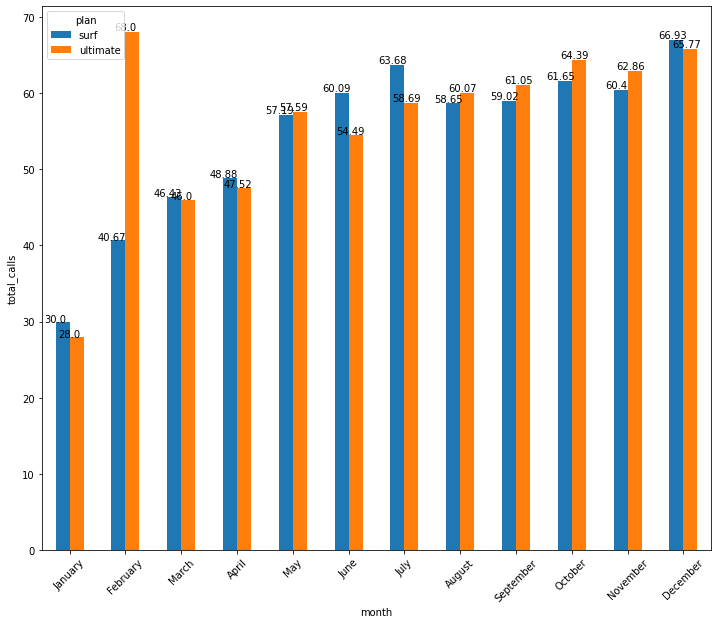

In [82]:
ax = calls_pivot.reindex(['January','February','March','April', 'May','June','July','August', 'September','October','November','December']).plot(kind='bar', figsize=(12, 10))
plt.ylabel('total_calls')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.010),\
               ha='center', va='center',
                   size=10)
plt.show()

Ternyata rata- rata panggilan pengguna paket **surf** dan **ultimate** hampir sama setiap bulannya. Namun kita mendapatkan hasil bahwa hanya di bulan Februari pengguna **ultimate** sepertinya melakukan banyak sekali panggilan, sehingga rata - ratanya berbeda sekitar 20 panggilan lebih banyak dengan pengguna paket **surf**.

Mungkin saja terdapat promo dari paket **ultimate** sehingga banyak orang yang berlangganan dan melakukan panggilan khusus di bulan Februari.

In [84]:
duration_pivot = df_grouped.pivot_table(values = 'total_duration', columns = 'plan', index = 'month', aggfunc = 'sum')
duration_pivot

plan,surf,ultimate
month,,
April,16646.0,6659.0
August,62801.0,28243.0
December,142459.0,65466.0
February,2532.0,2663.0
January,386.0,735.0
July,51425.0,23852.0
June,39546.0,16467.0
March,7163.0,3434.0
May,29070.0,11142.0


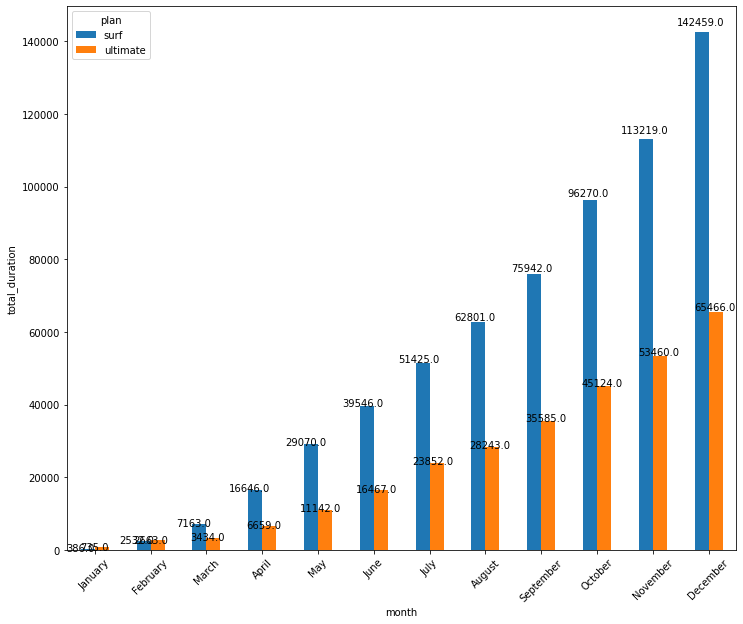

In [85]:
bx = duration_pivot.reindex(['January','February','March','April', 'May','June','July','August', 'September','October','November','December']).plot(kind='bar', figsize=(12, 10))
plt.ylabel('total_duration')
plt.xticks(rotation = 45)
for p in bx.patches:
    bx.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.020),\
               ha='center', va='center',
                   size=10)
plt.show()

Dari grafik diatas, kita dapat melihat bahwa total durasi panggilan yang dilakukan pengguna paket **surf** per bulannya selalu meningkat dari Januari hingga mencapai puncaknya di bulan Desember. Hal tersebut juga terjadi dengan pengguna paket **ultimate**. Namun, perbedaan jumlah durasi panggilan yang cukup signifikan dapat terlihat jelas antara pengguna kedua paket tersebut, dimana jumlah durasi pengguna paket **surf** 50% lebih banyak dibandingkan pengguna paket **ultimate**.

Hal ini mungkin saja terjadi karena pengguna paket **surf** jauh lebih banyak dibandingkan dengan pengguna paket **ultimate**. Mereka mungkin tidak melakukan banyak panggilan (merujuk pada grafik rata - rata panggilan antara kedua paket), namun ketika melakukan panggilan, ternyata durasinya sangat lama.

In [87]:
agg_data_duration = df_grouped.groupby('plan')['total_duration'].agg(['mean', 'median', 'std', 'var'])
agg_data_duration

,mean,median,std,var
plan,,,,
surf,412.594822,406.0,216.801762,47003.004118
ultimate,410.701262,400.0,224.760470,50517.268776


In [89]:
df_surf = df_with_income[df_with_income['plan'] == 'surf']
df_ultimate = df_with_income[df_with_income['plan'] == 'ultimate']

<AxesSubplot:xlabel='total_duration', ylabel='plan'>

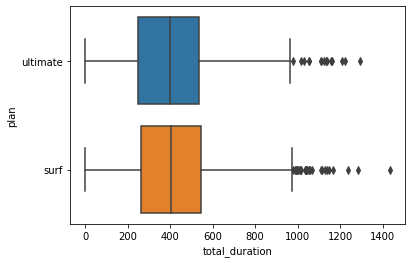

In [90]:
sns.boxplot(data = df_grouped, x='total_duration', y='plan')

Setelah melihat grafik *boxplot* dan melihat informasi nilai rata - rata dan varians dari durasi panggilan bulanan, data kita memiliki banyak sekali *outlier*. Nilai varians yang jauh lebih besar daripada nilai mean menunjukkan bahwa data memiliki variasi yang signifikan. Hal ini dapat mengindikasikan bahwa data tersebut memiliki banyak nilai yang jauh dari nilai rata-ratanya.

Namun, meskipun memiliki banyak *outliers*, nilai median dan nilai rata - rata durasi panggilan bulanan dari kedua paket (**surf** dan **ultimate**) ternyata hampir sama, yaitu berada di range angka 400 - 415. Hal ini menunjukkan bahwa distribusi data cenderung simetris (nilai yang lebih tinggi dan lebih rendah terdistribusi secara merata di kedua sisi median).

Kesimpulan sementara yang dapat kita ambil yaitu: data kita mengenai durasi panggilan memiliki variasi yang besar tetapi simetris, sehingga nilai mean dan median hampir sama. Sehingga dapat dikatakan perilaku pengguna paket **surf** dan **ultimate** dalam melakukan panggilan dan durasi panggilan tidak berbeda secara signifikan.

### Pesan/SMS

In [92]:
teks_pivot = df_grouped.pivot_table(values = 'total_message', columns = 'plan', index = 'month', aggfunc = 'sum')
teks_pivot

plan,surf,ultimate
month,,
April,870.0,463.0
August,4662.0,2732.0
December,12275.0,6796.0
February,108.0,151.0
January,21.0,62.0
July,3271.0,1937.0
June,2454.0,1379.0
March,351.0,243.0
May,1849.0,931.0


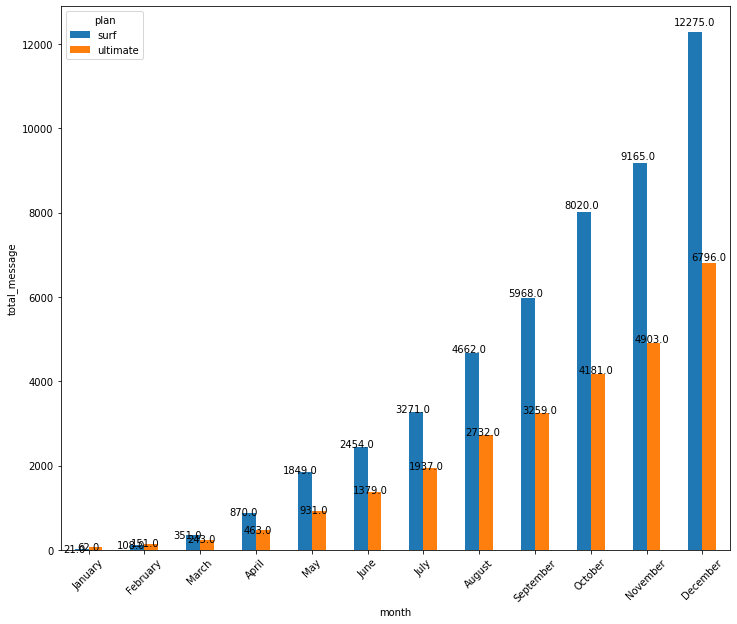

In [93]:
cx = teks_pivot.reindex(['January','February','March','April', 'May','June','July','August', 'September','October','November','December']).plot(kind='bar', figsize=(12, 10))
plt.ylabel('total_message')
plt.xticks(rotation = 45)
for p in cx.patches:
    cx.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.020),\
               ha='center', va='center',
                   size=10)
plt.show()

Dari grafik di atas, kita dapat menarik kesimpulan bahwa pengguna paket **surf** dan **ultimate** setiap bulannya mengalami peningkatan dalam mengirimkan pesan teks (SMS), yang mencapai puncak tertingginya di bulan Desember. Namun jika kita amati lebih lanjut, pada bulan Januari pengguna paket **ultimate** mengirimkan pesan teks jauh lebih banyak dibandingkan pengguna paket **surf**. Pada bulan selanjutnya, pengguna paket **surf** mulai mengalami peningkatan dalam mengirimkan pesan teks, dan semakin meningkat secara signifikan di bulan - bulan berikutnya, hingga mencapai 64% dari total pengiriman pesan teks dari kedua paket.

Sepertinya, banyak pengguna paket **surf** yang berlangganan paket prabayar dan menggunakannya untuk mengirimkan pesan teks dibandingkan melakukan panggilan.

### Internet

In [95]:
internet_pivot = df_grouped.pivot_table(values = 'gb_used', columns = 'plan', index = 'month', aggfunc = 'sum')
internet_pivot

plan,surf,ultimate
month,,
April,611.0,343.0
August,2735.0,1267.0
December,5800.0,2778.0
February,110.0,121.0
January,10.0,29.0
July,2042.0,973.0
June,1502.0,725.0
March,312.0,221.0
May,1087.0,489.0


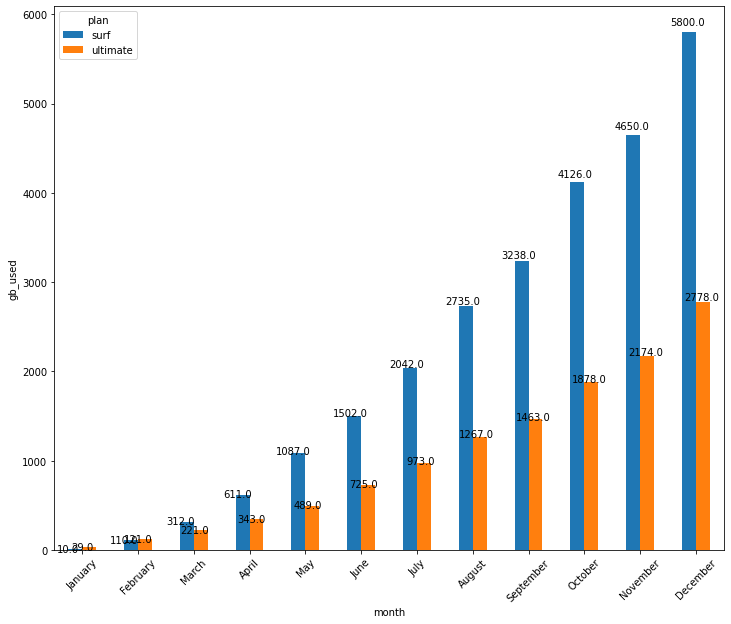

In [96]:
dx = internet_pivot.reindex(['January','February','March','April', 'May','June','July','August', 'September','October','November','December']).plot(kind='bar', figsize=(12, 10))
plt.ylabel('gb_used')
plt.xticks(rotation = 45)
for p in dx.patches:
    dx.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.020),\
               ha='center', va='center',
                   size=10)
plt.show()

Dari grafik di atas, kita dapat menarik kesimpulan bahwa pengguna paket **surf** dan **ultimate** setiap bulannya sama - sama mengalami peningkatan dalam menggunakan internet, yang mencapai puncak tertingginya di bulan Desember. Namun jika kita amati lebih lanjut, pada bulan Januari pengguna paket **ultimate** menggunakan internet jauh lebih banyak dibandingkan pengguna paket **surf**. Pada bulan selanjutnya, pengguna paket **surf** mulai mengalami peningkatan dalam menggunakan internet, dan semakin meningkat secara signifikan di bulan - bulan berikutnya, hingga mencapai sekitar 67% dari total pengiriman pesan teks dari kedua paket.

Sepertinya, banyak pengguna paket **surf** yang menggunakan internet dibandingkan melakukan panggilan, maupun mengirimkan pesan teks.

**Kesimpulan Sementara**

Setelah melihat grafik mengenai total panggilan, jumlah durasi, jumlah pesan teks dan juga jumlah penggunaan internet, kita dapat melihat bahwa perilaku pengguna antara kedua paket tidak berbeda.
- Pengguna paket **surf** dan **ultimate** memiliki perilaku yang mirip dalam melakukan panggilan, dimana setiap bulan rata - ratanya hampir sama, kecuali di bulan Februari, pengguna **ultimate** sangat banyak melakukan panggilan hingga mencapai dua kali lipat lebih banyak dibandingkan pengguna paket **surf**.

- Meskipun total panggilan mereka hampir sama, namun ternyata durasi panggilan pengguna paket **surf** jauh lebih banyak dibandingkan pengguna paket **ultimate**. Tetapi, pola perilaku mereka masih sama, jumlah durasi panggilan para pengguna dari kedua paket setiap bulan mengalami peningkatan setiap bulannya, dari bulan Januari hingga tertinggi di bulan Desember.

- Pengguna paket **surf** dan **ultimate** memiliki perilaku yang hampir sama dalam mengirimkan pesan teks dan pemakaian internet. Setiap bulan, pemakaian pengguna kedua paket sama - sama selalu mengalami peningkatan hingga mencapai puncaknya di bulan Desember.

- Jika dilihat dari persentase pemakaiannya, pengguna paket **surf** paling banyak menggunakan paketnya untuk mengakses internet dibandingkan melakukan panggilan dan mengirimkan pesan teks. Sedangkan untuk pengguna paket **ultimate** paling banyak menggunakan paketnya untuk mengirimkan pesan teks dan menggunakan internet dibandingkan melakukan panggilan.

## Pendapatan

Setelah mempelajari perilaku dari pengguna untuk masing - masing paket **surf** dan **ultimate** per bulannya, kita dapat menarik kesimpulan sementara bahwa tidak nampak perbedaan yang signifikan antara pengguna paket **surf** dan **ultimate**.

Namun untuk melihat paket mana yang lebih menguntungkan, kita perlu melihat pendapatan dari masing - masing paket.

In [97]:
surf_income = df_with_income.loc[df_with_income['plan'] == 'surf']['income'].sum()
surf_income

94902.13

In [98]:
ultimate_income = df_with_income.loc[df_with_income['plan'] == 'ultimate']['income'].sum()
ultimate_income

50400.0

In [99]:
df_with_income.loc[df_with_income['plan'] == 'surf']['income'].describe()

count    1573.000000
mean       60.331933
std        55.263890
min        20.000000
25%        20.000000
50%        40.150000
75%        80.000000
max       588.660000
Name: income, dtype: float64

In [100]:
df_with_income.loc[df_with_income['plan'] == 'ultimate']['income'].describe()

count    720.0
mean      70.0
std        0.0
min       70.0
25%       70.0
50%       70.0
75%       70.0
max       70.0
Name: income, dtype: float64

Setelah melihat pendapatan yang diperoleh dari masing - masing paket, kita mendapatkan sesuatu yang unik. Ternyata, kita tidak mendapatkan banyak keuntungan dari paket **ultimate** yang harganya lebih mahal. Mungkin karena para pengguna paket **ultimate** hanya memanfaatkan kuota gratis yang disediakan dan tidak pernah melebihi batas kuota gratis tersebut.

Berbeda dengan pengguna paket **surf** dimana kita mendapatkan rata - rata keuntungan dari paket ini sekitar $60 per pengguna.

Jadi, kita dapat menyimpulkan bahwa paket **surf** akan lebih baik dalam memberikan keuntungan bagi perusahaan. Harga jualnya memang murah, namun, ternyata orang - orang lebih suka membeli sesuatu dengan harga yang murah dan membayar lebih untuk tambahan kuota jika mereka sudah menggunakan seluruh kuota gratisnya baik untuk panggilan, pesan teks maupun pemakaian internet, dibandingkan dengan membeli dengan harga yang mahal, meskipun sebenarnya mereka akan mendapat kuota gratis yang lebih besar.

## Menguji Hipotesis Statistik

Kita telah mencoba mempelajari perilaku pengguna paket **surf** dan **ultimate**, dan juga telah menghitung pendapatan dari kedua paket tersebut.

Selanjutnya, kita akan menguji hipotesis kita di awal, yaitu:

1. Pendapatan rata-rata dari pengguna paket prabayar **Ultimate** dan **Surf** berbeda.
2. Pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

**Menguji Hipotesis Pertama**

Untuk hipotesis pertama, kita akan mencoba melakukan *ttest_ind(sample_1, sample_2)* dari paket modul *scipy.stats* dan bandingkan hasil nilai p dengan "alpha".

H0 : rata - rata pendapatan (*income*) dari paket **surf** dan **ultimate** sama.

H1 :rata - rata pendapatan (*income*) dari paket **surf** dan **ultimate** berbeda. 

In [102]:
income_data = df_with_income.groupby('plan')['income'].agg(['mean', 'var'])
income_data

,mean,var
plan,,
surf,60.331933,3054.097506
ultimate,70.000000,0.000000


In [103]:
sample_1 = df_surf['income']
sample_2 = df_ultimate['income']

In [104]:
alpha = 0.05
result = st.ttest_ind(sample_1, sample_2, equal_var=False)
result.pvalue

5.7746570699309054e-12

In [105]:
if (result.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Tolak null hipotesis


Setelah melakukan ttest_ind, hasil uji statistik menunjukkan bahwa p-value < alpha, dan hasil uji hipotesis menyatakan "Tolak null hipotesis," maka kita dapat menyimpulkan bahwa ada bukti yang cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1) pada tingkat signifikansi yang telah ditentukan (nilai alpha = 0.05).

Sehingga bisa dikatakan bahwa ada perbedaan antara rata - rata pendapatan paket **surf** dan **ultimate**.

Maka dari itu, hipotesis pertama kita yang menyatakan bahwa pendapatan rata-rata dari pengguna paket prabayar **Ultimate** dan **Surf** berbeda dapat diterima sepenuhnya.

**Menguji Hipotesis Kedua**

Untuk hipotesis kedua, kita masih akan menggunakan *ttest_ind(sample_1, sample_2)* dari paket modul *scipy.stats* dan bandingkan hasil nilai p dengan "alpha".

H0 : rata-rata pendapatan dari pengguna di wilayah NY-NJ sama dengan pendapatan pengguna dari wilayah lain.

H1 : rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

In [106]:
sample_3 = df_with_income.loc[df_with_income['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'income']
sample_4 = df_with_income.loc[df_with_income['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'income']

In [107]:
sample_3.mean()

58.75769230769231

In [108]:
sample_4.mean()

64.27478079331941

In [109]:
alpha = 0.05
results = st.ttest_ind(sample_3, sample_4, equal_var=False)
results.pvalue

0.024587417830077708

In [110]:
if (result.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Tolak null hipotesis


Setelah melakukan ttest_ind, hasil uji statistik menunjukkan bahwa p-value < alpha, dan hasil uji hipotesis menyatakan "Tolak null hipotesis," maka kita dapat menyimpulkan bahwa ada bukti yang cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1) pada tingkat signifikansi yang telah ditentukan (nilai alpha = 0.05).

Sehingga bisa dikatakan bahwa ada perbedaan antara rata - rata pendapatan pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain.

Maka dari itu, hipotesis kedua kita yang menyatakan bahwa pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain dapat diterima sepenuhnya.


## Kesimpulan Umum

Kita telah mencoba untuk mengolah data dan membuktikan hipotesis kita dapat diterima atau tidak.

Data awal yang kita punya terdiri dari 5 tabel, yaitu:

1. Tabel `calls` dimana berisi informasi jumlah panggilan pengguna.
2. Tabel `messages` dimana berisi informasi pesan pengguna.
3. Tabel `internet` dimana berisi informasi pemakaian sesi web pengguna.
4. Tabel `plans` berisi informasi paket telepon prabayar yang digunakan oleh pengguna. Dimana kita memiliki 2 paket yaitu **surf** dan **ultimate**.
5. Tabel `users` yang berisi informasi pengguna.

Dari tahap pra-pemrosesan data terhadap masing - masing tabel, kita mendapat kesimpulan, bahwa:

1. Kesalahan - kesalahan pada tipe data di beberapa kolom pada tabel yang kita miliki sudah diperbaiki. Masing - masing kolom dan tabel tersebut adalah:
    * Kolom `reg_date` dan `churn_date` pada tabel `users`
    * Kolom `call_date` pada tabel `calls`
    * Kolom `message_date` pada tabel `messages`
    * Kolom `session_date` pada abel `internet`
    
2. Terdapat nilai 0.00 pada sekitar 20% data kolom `duration` pada tabel `calls`, dan data tersebut tidak dihapus karena diasumsikan ini adalah panggilan tidak terjawab, namun masih dapat berpengaruh terhadap penelitian kita.

3. Kita juga sudah memperbaiki nilai yang hilang pada kolom `churn_date` pada tabel `users` dimana nilai NaT tidak dirubah karena menandakan pengguna masih menggunakan paket hingga saat ini.

4. Tidak terdapat duplikat pada data yang kita miliki.

Setelah selesai memperbaiki data yang bermasalah, kita mencoba mempelajari perilaku pengguna dengan menggabungkan data - data per pengguna seperti data total panggilan, durasi panggilan, pesan teks, dan internet dan membandingkannya antara pengguna paket **surf** dan paket **ultimate**.

Kita mencoba memvisualisasikannya dalam bentuk grafik histogram dan boxplot, dan didapat kesimpulan bahwa perilaku antara pengguna paket **surf** dan **ultimate** tidak berbeda jauh, namun jumlah pemakaian mereka yang berbeda jauh.

1. Pengguna paket **surf** dan **ultimate** memiliki perilaku yang mirip dalam melakukan panggilan, dimana setiap bulan rata - ratanya hampir sama, kecuali di bulan Februari, pengguna **ultimate** sangat banyak melakukan panggilan hingga mencapai dua kali lipat lebih banyak dibandingkan pengguna paket **surf**.

2. Meskipun total panggilan mereka hampir sama, namun ternyata durasi panggilan pengguna paket **surf** jauh lebih banyak dibandingkan pengguna paket **ultimate**. Tetapi, pola perilaku mereka masih sama, jumlah durasi panggilan para pengguna dari kedua paket setiap bulan mengalami peningkatan setiap bulannya, dari bulan Januari hingga tertinggi di bulan Desember.

3. Pengguna paket **surf** dan **ultimate** memiliki perilaku yang hampir sama dalam mengirimkan pesan teks dan pemakaian internet. Setiap bulan, pemakaian pengguna kedua paket sama - sama selalu mengalami peningkatan hingga mencapai puncaknya di bulan Desember. Namun, jumlah pesan teks dan pemakaian internet antara pengguna paket **surf** dan **ultimate** berbeda jauh.

Setelah mempelajari perilaku pengguna, kita juga mencoba melakukan perhitungan pendapatan untuk mendapatkan kesimpulan, paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga bisa dibuat anggaran iklan yang sesuai. Ternyata, paket **surf** menghasilkan lebih banyak pendapatan dibandingkan dengan paket **ultimate**. Hal ini mungkin terjadi karena orang lebih suka membeli sesuatu dengan harga relatif murah, meskipun mereka akan membayar lebih untuk selanjutnya, dibandingkan membeli sesuatu yang bernilai mahal di awalnya.

Pada awal proyek, kita telah merumuskan hipotesis sebagai berikut:

1. Pendapatan rata-rata dari pengguna paket prabayar **Ultimate** dan **Surf** berbeda.
2. Pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain

Setelah menganalisis data dan melakukan uji hipotesis statistik dengan merumuskan hipotesis nol dan alternatif dan melakukan pengujian t-test, kita mendapatkan kesimpulan bahwa:

1. Pendapatan rata-rata dari pengguna paket prabayar **Ultimate** dan **Surf** berbeda.

Hipotesis ini dapat diterima, karena pendapatan rata - rata dari pengguna paket prabayar **surf** jauh lebih besar dibandingkan dengan pendapatan dari pengguna paket **ultimate**.

2. Pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Hipotesis ini dapat diterima sepenuhnya, karena pendapatan rata - rata dari pengguna di wilayah NY-NJ lebih kecil dibandingkan dengan pengguna dari wilayah lain, sehingga nilainya berbeda.

Dengan demikian, kita sudah menguji hipotesis kita dan menarik kesimpulan. Perusahaan Megaline dapat mempromosikan paket **surf** yang berpotensi menghasilkan pendapatan lebih banyak dan mempromosikan iklan lebih banyak di wilayah NY-NJ supaya menarik lebih banyak pengguna di wilayah tersebut. 
 